**Code reviewer**

¡Hola en esta nueva aventura!

Mi nombre es **Ivan Hernandez** y seré tu revisor de código para este proyecto.

Revisaré todo el cuaderno con preguntas o comentarios dejados atrás. Te animo a responder los comentarios con cualquier duda o solución a la recomendación o problema presentado **(con la celda en color azul)**, esa es la mejor manera de entender y aprender en este nuevo mundo de datos y programación. Seguiré la misma lista de verificación y los mismos pasos en los criterios de evaluación del proyecto.

 Importante, <span style="color:red">por favor no cambies mis comentarios</span>, es una buena forma de seguir tu aprendizaje por mí y otros revisores de código y finalmente, pongo un ejemplo del color del código y su significado.

<div class="alert alert-success">
<h2> Comentarios del revisor </h2>
Excelente trabajo y ejecución
</div>

<div class="alert alert-warning">
<h2> Comentarios del revisor </h2>
Comentario no crítico; si hay menos de tres de tales comentarios, el proyecto puede aceptarse sin su refinamiento.</div>

<div class="alert alert-danger">
<h2> Comentarios del revisor </h2>
Error que debe corregirse, de lo contrario el proyecto no será aceptado.
</div>

# Proyecto Curso 8

Como empleado de Beta Bank, me preocupa la pérdida constante de clientes que hemos estado experimentando mes tras mes. Los banqueros han descubierto que es más costoso atraer nuevos clientes que retener a los existentes, por lo que necesitamos encontrar una solución para predecir si un cliente dejará el banco pronto y tomar medidas preventivas.

Afortunadamente, cuento con datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco para crear un modelo de predicción. Mi objetivo es lograr el máximo valor F1 posible, con un valor mínimo aceptable de 0.59 para aprobar la revisión.

Voy a comenzar por utilizar estos datos para entrenar un modelo de machine learning que pueda predecir si un cliente dejará el banco próximamente. Utilicé técnicas de aprendizaje supervisado y evalué varios algoritmos, como regresión logística, árboles de decisión y Random Forest, para determinar cuál proporciona el mejor rendimiento.

## Importacion de librerias y visualizacion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
print(data.info())
print(data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None
0


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [6]:
data.query('Tenure.isna()')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [7]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [8]:
#Eliminemos la columna "Surname" y "RowNumber", pues no sirve para el analisis
data = data.drop(['Surname', 'RowNumber', 'CustomerId'], axis=1)

<div class="alert alert-danger">
<h2> Comentarios del revisor </h2>
    
Debes tener cuidado en está sección, veo que se usa el `CustomerId` en los modelos, esto solo añade ruido dado que no es una variable que deba ir en los modelos. No ayuda a identificar nada de la perdida del cliente.</div>

<div class="alert alert-info">
<h1> Comentarios del estudiante</h1>
Listo! Tienes razon y he eliminado esa variable
</div>

<div class="alert alert-success">
<h2> Comentarios del revisor V2</h2>
Muy buen trabajo!
</div>

In [9]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Vemos las columnas, y podemos clasificar aquellas que son categoricas o no. Tambien notamos que hay valores ausentes, por lo cual se debe tratar en la siguiente seccion.

<div class="alert alert-success">
<h2> Comentarios del revisor </h2>
Muy buena primera sección!
</div>

## Tratar valores ausentes

Los valores ausentes cubren alrededor de 10% del total de datos, por lo que vamos a tratarlos de la siguiente forma: No es posible reemplazarlos con otros valores, ya que puede desviar el fin de la investigacion a datos erroneos o no los que buscamos. Por lo tanto, se los eliminara, pues no se puede trabajar con los datos ausentes en el modelo.

In [10]:
data = data.dropna()

<div class="alert alert-warning">
<h2> Comentarios del revisor </h2>

Recuerda que eliminar los datos debe ser una de tus últimas estrategias. Puedes agrupar basado en otras variables y reemplazr. 
</div>

<div class="alert alert-info">
<h1> Comentarios del estudiante</h1>
Claro que si, solo considere que puede desviar algo el analisis.
</div>

In [11]:
data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Separemos el conjunto de entrenamiento y validacion

In [12]:
# Codificar variables categóricas con one-hot encoding
ohe_encoder = OneHotEncoder(drop='first')
data_encoded = ohe_encoder.fit_transform(data).toarray()

#Hacemos los features y targets
data_ohe = pd.get_dummies(data, drop_first=True)
features = data_ohe.drop(['Exited'], axis=1)
target = data_ohe['Exited']

#Separamos test de validacion y entrenamiento
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

In [13]:
# Undersampling
# Encontrar el índice de muestras negativas 
negative_samples_index_undersampled = target_train[target_train == 0].index

# Muestrear aleatoriamente la misma cantidad de muestras positivas (reclamaciones)
positive_samples_index_undersampled = resample(target_train[target_train == 1].index, n_samples=len(negative_samples_index_undersampled), random_state=12345)

# Combinar los índices de muestras negativas y positivas
undersampled_index = negative_samples_index_undersampled.union(positive_samples_index_undersampled)

# Subconjunto de entrenamiento con undersampling
features_train_undersampled = features_train.loc[undersampled_index]
target_train_undersampled = target_train.loc[undersampled_index]

# Oversampling
# Encontrar el índice de muestras positivas (reclamaciones)
positive_samples_index_oversampled = target_train[target_train == 1].index

# Muestrear aleatoriamente la misma cantidad de muestras negativas (no reclamaciones)
negative_samples_index_oversampled = resample(target_train[target_train == 0].index, n_samples=len(positive_samples_index_oversampled), random_state=12345)

# Combinar los índices de muestras negativas y positivas
oversampled_index = positive_samples_index_oversampled.union(negative_samples_index_oversampled)

# Subconjunto de entrenamiento con oversampling
features_train_oversampled = features_train.loc[oversampled_index]
target_train_oversampled = target_train.loc[oversampled_index]

In [14]:
#Usemos StandardScaler para no tener problemas en el modelo
scaler = StandardScaler()

#Ahora apliquemoslo
numerical_features = ['Age', 'Tenure', 'Balance', 'EstimatedSalary', 'CreditScore', 'NumOfProducts', 'IsActiveMember', 'HasCrCard']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

/tmp/ipykernel_67/2754901282.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_features] = scaler.fit_transform(data[numerical_features])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


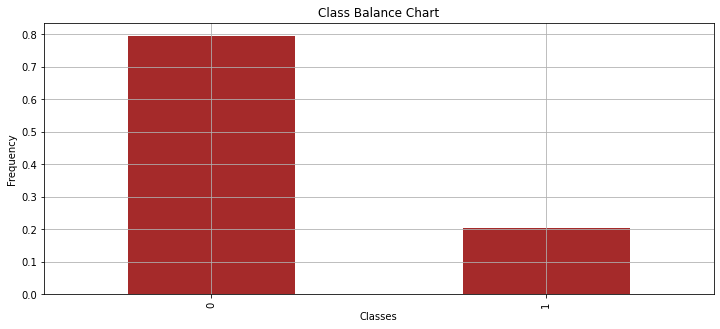

In [15]:
#Revisemos el balance de las clases
balance = data['Exited'].value_counts(normalize=True)

balance.plot(kind='bar', grid=True, figsize= (12,5), color='brown')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Class Balance Chart')
plt.show()

Vemos que las clases no tienen un desbalance significante, por lo que no se puede ver mediante pruebas si es que hay un cambio significante en el modelo de machine learning cuando se use.

<div class="alert alert-success">
<h2> Comentarios del revisor </h2>

Excelente trabajo con la sección!
</div>

## Prueba de modelos

Vamos a usar los modelos que mas puedan aplicar al objetivo, intentando encontrar el mas apto y que supere el umbral impuesto.

### Regresion Logistica


In [16]:
#Hagamos un modelo sin balancear
model_unbal = LogisticRegression(random_state=12345, solver='liblinear')

#Entrenamos el modelo
model_unbal.fit(features_train, target_train)

#Hacemos predicciones
predictions_model_unbal = model_unbal.predict(features_valid)

#Calculamos la precision
f1_unbal = f1_score(target_valid, predictions_model_unbal)
precision_unbal = precision_score(target_valid, predictions_model_unbal, zero_division = 1)
recall_unbal = recall_score(target_valid, predictions_model_unbal)
auc_roc_unbal = roc_auc_score(target_valid, model_unbal.predict_proba(features_valid)[:, 1])

#Mostramos
print("Resultados para el modelo sin balancear:")
print("F1 Score: {:.4f}".format(f1_unbal))
print("Precisión: {:.4f}".format(precision_unbal))
print("Recall: {:.4f}".format(recall_unbal))
print("AUC-ROC: {:.4f}".format(auc_roc_unbal))

Resultados para el modelo sin balancear:
F1 Score: 0.0087
Precisión: 0.2857
Recall: 0.0044
AUC-ROC: 0.6631


In [17]:
#Creamos el modelo de regresion logistica submuestreado y sobremuestreado
model_undersampled = LogisticRegression(random_state=12345, solver='liblinear')
model_oversampled = LogisticRegression(random_state=12345, solver='liblinear')

#Entrenamos el modelo
model_undersampled.fit(features_train_undersampled, target_train_undersampled)
model_oversampled.fit(features_train_oversampled, target_train_oversampled)

#Calculamos las metricas de precision del modelo con submuestreo
predictions_valid_undersampled = model_undersampled.predict(features_valid)
f1score_valid_undersampled = f1_score(target_valid, predictions_valid_undersampled)
precision_valid_undersampled = precision_score(target_valid, predictions_valid_undersampled)
recall_valid_undersampled = recall_score(target_valid, predictions_valid_undersampled)
auc_roc_valid_undersampled = roc_auc_score(target_valid, model_undersampled.predict_proba(features_valid)[:, 1])

#Calculamos las metricas de precision del modelo con sobremuestreo
predictions_valid_oversampled = model_oversampled.predict(features_valid)
f1score_valid_oversampled = f1_score(target_valid, predictions_valid_oversampled)
precision_valid_oversampled = precision_score(target_valid, predictions_valid_oversampled)
recall_valid_oversampled = recall_score(target_valid, predictions_valid_oversampled)
auc_roc_valid_oversampled = roc_auc_score(target_valid, model_oversampled.predict_proba(features_valid)[:, 1])

#Mostramos los resultados
print("Resultados para el modelo con undersampling:")
print("F1 Score: {:.4f}".format(f1score_valid_undersampled))
print("Precisión: {:.4f}".format(precision_valid_undersampled))
print("Recall: {:.4f}".format(recall_valid_undersampled))
print("AUC-ROC: {:.4f}".format(auc_roc_valid_undersampled))

print("\nResultados para el modelo con oversampling:")
print("F1 Score: {:.4f}".format(f1score_valid_oversampled))
print("Precisión: {:.4f}".format(precision_valid_oversampled))
print("Recall: {:.4f}".format(recall_valid_oversampled))
print("AUC-ROC: {:.4f}".format(auc_roc_valid_oversampled))

Resultados para el modelo con undersampling:
F1 Score: 0.4522
Precisión: 0.3358
Recall: 0.6918
AUC-ROC: 0.7193

Resultados para el modelo con oversampling:
F1 Score: 0.4433
Precisión: 0.3308
Recall: 0.6718
AUC-ROC: 0.7236


In [18]:
#Creamos el modelo de Regresion Logistica con las clases balanceadas
model_bal = LogisticRegression(class_weight='balanced', solver='liblinear')

#Entrenamos el modelo
model_bal.fit(features_train, target_train)

#Hacemos predicciones
predictions_bal = model_bal.predict(features_valid)

#Hacemos las medidas de precision
f1_bal = f1_score(target_valid, predictions_bal)
precision_bal = precision_score(target_valid, predictions_bal)
recall_bal = recall_score (target_valid, predictions_bal)
auc_roc_bal = roc_auc_score(target_valid, predictions_bal)

#Mostramos
print("Resultados para el modelo balanceado:")
print("F1 Score: {:.4f}".format(f1_bal))
print("Precisión: {:.4f}".format(precision_bal))
print("Recall: {:.4f}".format(recall_bal))
print("AUC-ROC: {:.4f}".format(auc_roc_bal))


Resultados para el modelo balanceado:
F1 Score: 0.5104
Precisión: 0.3913
Recall: 0.7339
AUC-ROC: 0.7256


Vemos que hay diferencia entre balancear las clases y no, pues teniendo las clases balanceadas los resultados de las herramientas de precision son mas altas y preferibles, pero no alcanzan el umbral requerido. Vamos a intentar con otros modelos.

## DecisionTreeClassifier

In [19]:
#Para arboles y bosques se necesita OrdinalEncoder, entonces usemoslo
ordinal_encoder = OrdinalEncoder()
data_ordinal =  pd.DataFrame(ordinal_encoder.fit_transform(data), columns=data.columns)

features_2 = data_ordinal.drop(['Exited'], axis=1)
target_2 = data_ordinal['Exited']

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2, target_2, test_size=0.25, random_state=12345)

In [20]:
# Undersampling
# Encontrar el índice de muestras negativas 
negative_samples_index_undersampled_2 = target_train_2[target_train_2 == 0].index

# Muestrear aleatoriamente la misma cantidad de muestras positivas (reclamaciones)
positive_samples_index_undersampled_2 = resample(target_train_2[target_train_2 == 1].index, n_samples=len(negative_samples_index_undersampled_2), random_state=12345)

# Combinar los índices de muestras negativas y positivas
undersampled_index_2 = negative_samples_index_undersampled_2.union(positive_samples_index_undersampled_2)

# Subconjunto de entrenamiento con undersampling
features_train_undersampled_2 = features_train_2.loc[undersampled_index_2]
target_train_undersampled_2 = target_train_2.loc[undersampled_index_2]

# Oversampling
# Encontrar el índice de muestras positivas (reclamaciones)
positive_samples_index_oversampled_2 = target_train_2[target_train_2 == 1].index

# Muestrear aleatoriamente la misma cantidad de muestras negativas (no reclamaciones)
negative_samples_index_oversampled_2 = resample(target_train_2[target_train_2 == 0].index, n_samples=len(positive_samples_index_oversampled_2), random_state=12345)

# Combinar los índices de muestras negativas y positivas
oversampled_index_2 = positive_samples_index_oversampled_2.union(negative_samples_index_oversampled_2)

# Subconjunto de entrenamiento con oversampling
features_train_oversampled_2 = features_train_2.loc[oversampled_index_2]
target_train_oversampled_2 = target_train_2.loc[oversampled_index_2]

In [21]:
features_train_2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1349,156.0,1.0,0.0,25.0,3.0,4083.0,0.0,1.0,0.0,299.0
6740,285.0,0.0,1.0,20.0,3.0,0.0,1.0,1.0,0.0,2996.0
6816,152.0,1.0,1.0,19.0,9.0,1169.0,1.0,0.0,1.0,4793.0
5145,147.0,2.0,1.0,10.0,8.0,0.0,1.0,0.0,0.0,8970.0
6678,210.0,0.0,1.0,22.0,4.0,1618.0,1.0,1.0,1.0,1745.0
...,...,...,...,...,...,...,...,...,...,...
4478,380.0,1.0,1.0,16.0,10.0,3481.0,0.0,0.0,0.0,1655.0
4094,271.0,0.0,0.0,26.0,8.0,4564.0,0.0,1.0,1.0,5251.0
3492,154.0,0.0,0.0,11.0,6.0,1727.0,0.0,1.0,1.0,1675.0
2177,163.0,0.0,0.0,34.0,9.0,0.0,0.0,1.0,0.0,7946.0


Vemos que en el caso de este dataset, el dataset original tuvo mejores resultados en las medidas de precision que el de submuestreo y sobremuestreo. Aun no llegamos al umbral requerido, por lo que podemos intentar con el bosque de regresion.

## Bosque Clasificador

In [22]:
#Hacemos un modelo de Bosque de Regresion
clf_model = RandomForestClassifier(n_estimators=100, max_depth= 10, random_state=12345)

#Entrenamos el modelo con submuestreo
clf_model.fit(features_train_undersampled_2, target_train_undersampled_2)
predictions_undersampled_2 = clf_model.predict(features_valid_2)

#Entrenamos el modelo con sobremuestreo
clf_model.fit(features_train_oversampled_2, target_train_oversampled_2)
predictions_oversampled_2 = clf_model.predict(features_valid_2)

#Entrenamos el modelo con los datos sin modificar
clf_model.fit(features_train_2, target_train_2)
predictions_normal_2 = clf_model.predict(features_valid_2)

#Sacamos las medidas de precision para los tres arboles
f1score_normal = f1_score(target_valid_2, predictions_normal_2)
precision_normal = precision_score(target_valid_2, predictions_normal_2)
recall_normal = recall_score(target_valid_2, predictions_normal_2)
roc_auc_normal = roc_auc_score(target_valid_2, clf_model.predict_proba(features_valid_2)[:, 1])

f1score_undersampled_2 = f1_score(target_valid_2, predictions_undersampled_2)
precision_undersampled_2 = precision_score(target_valid_2, predictions_undersampled_2)
recall_undersampled_2 = recall_score(target_valid_2, predictions_undersampled_2)
roc_auc_undersampled_2 = roc_auc_score(target_valid_2, clf_model.predict_proba(features_valid_2)[:, 1])

f1score_oversampled_2 = f1_score(target_valid_2, predictions_oversampled_2)
precision_oversampled_2 = precision_score(target_valid_2, predictions_oversampled_2)
recall_oversampled_2 = recall_score(target_valid_2, predictions_oversampled_2)
roc_auc_oversampled_2 = roc_auc_score(target_valid_2, clf_model.predict_proba(features_valid_2)[:, 1])

#Mostramos
print("Resultados en el dataset original:")
print("F1 Score: ", f1score_normal)
print("Precision: ", precision_normal)
print("Recall: ", recall_normal)
print("AUC ROC: ", roc_auc_normal)

print("\nResultados en el dataset submuestrado:")
print("F1 Score: ", f1score_undersampled_2)
print("Precision: ", precision_undersampled_2)
print("Recall: ", recall_undersampled_2)
print("AUC ROC: ", roc_auc_undersampled_2)

print("\nResultados en el dataset sobremuestrado:")
print("F1 Score: ", f1score_oversampled_2)
print("Precision: ", precision_oversampled_2)
print("Recall: ", recall_oversampled_2)
print("AUC ROC: ", roc_auc_oversampled_2)

Resultados en el dataset original:
F1 Score:  0.5504322766570606
Precision:  0.7860082304526749
Recall:  0.42350332594235035
AUC ROC:  0.8643920936764501

Resultados en el dataset submuestrado:
F1 Score:  0.59822309970385
Precision:  0.5391459074733096
Recall:  0.6718403547671841
AUC ROC:  0.8643920936764501

Resultados en el dataset sobremuestrado:
F1 Score:  0.548489666136725
Precision:  0.4275092936802974
Recall:  0.7649667405764967
AUC ROC:  0.8643920936764501


Finalmente podemos ver que el bosque clasificador nos ayudo y paso el umbral con el dataset submuestreado, por lo que el siguiente paso seria aplicar este bosque al conjunto de prueba.

In [25]:
#Hacemos el conjunto de prueba
final_features_valid, final_features_test, final_target_valid, final_target_test = train_test_split(features_valid_2, target_valid_2, test_size=0.5, random_state=54321)

# Perform undersampling on the validation set
# Find the indices of negative samples in the validation set
negative_samples_index_undersampled_3 = final_target_valid[final_target_valid == 0].index

# Randomly sample the same number of positive samples (reclamations)
positive_samples_index_undersampled_3 = resample(final_target_valid[final_target_valid == 1].index, n_samples=len(negative_samples_index_undersampled_3), random_state=12345)

# Combine the indices of negative and positive samples
undersampled_index_3 = negative_samples_index_undersampled_3.union(positive_samples_index_undersampled_3)

# Filter final_features_valid and final_target_valid with the undersampled index
mask = final_features_valid.index.isin(undersampled_index_3)
final_features_valid_undersampled = final_features_valid.loc[mask]
final_target_valid_undersampled = final_target_valid.loc[mask]

# Train a model on the undersampled validation set
final_model = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=12345)
final_model.fit(final_features_valid_undersampled, final_target_valid_undersampled)

#Hacemos predicciones
final_predictions = final_model.predict(final_features_valid_undersampled)

#Hacemos las medidas de precision
final_f1score = f1_score(final_target_valid_undersampled, final_predictions)
final_precision = precision_score(final_target_valid_undersampled, final_predictions)
final_recall = recall_score(final_target_valid_undersampled, final_predictions)
final_roc_auc = roc_auc_score(final_target_valid_undersampled, final_predictions)

#Mostramos
print("Results with undersampled validation set:")
print("F1 Score: ", final_f1score)
print("Precision: ", final_precision)
print("Recall: ", final_recall)
print("AUC ROC: ", final_roc_auc)

Results with undersampled validation set:
F1 Score:  0.8673469387755102
Precision:  0.9941520467836257
Recall:  0.7692307692307693
AUC ROC:  0.8840677394894262


Vemos que el conjunto de prueba paso el umbral requerido con un 0.88, por lo que significa que el modelo tiene un buen funcionamiento.

# Conclusiones Generales

Podemos ver que en el dataset hubo ciertos inconvenientes tal como valores ausentes y desbalance de clases, pero se pudo solucionar eliminando los datos ausentes para el analisis de Machine Learning y usando dos diferentes tipo de balanceo de clases tal como submuestreo y sobremuestreo.

Se hicieron todos los analisis, saliendo como mejor resultado el modelo de Bosque Clasificador, superando el umbral requerido. Al lograr pasar el entrenamiento, se hicieron los conjuntos de prueba. Luego al usar el modelo preferido de Bosque Clasificador, se pudo determinar los parametros necesarios como 13 estimadores y profundidad maxima de 10, con una aleatoridad de "12345". 

Para concluir se puede decir que este modelo tuvo las implementaciones necesarias como son las medidas de precision, balance de clases, etiquetas que sirvan para el modelo (OrdinalEncoder, al tratarse de arboles y bosques), y explicacion paso a paso del uso de los parametros, etc. 

<div class="alert alert-danger">
<h2> Comentarios del revisor </h2>

Muy buen trabajo con todo el proyecto, es clara cada una de las decisiones que tomas y porque. Solo dejó un comentario pequeño a una de las variables que no debería ir, seguro no tendrás problemas corrigiendo esto. 

Saludos!
</div>

<div class="alert alert-info">
<h1> Comentarios del estudiante</h1>
Solucionado! He eliminado la variable que puede desviar la investigacion.
</div>

<div class="alert alert-success">
<h2> Comentarios del revisor V2</h2>
Muy buen trabajo en general! Cumpliste con todos los objetivos del proyecto. Felicitaciones por la aprobación!
</div>